In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
df = pandas.read_csv('data/MLTempDataset1.csv')
df.head

<bound method NDFrame.head of       Unnamed: 0             Datetime  Hourly_Temp
0              0  2022-01-04 00:00:00       20.867
1              1  2022-01-04 01:00:00       21.000
2              2  2022-01-04 02:00:00       20.867
3              3  2022-01-04 03:00:00       20.650
4              4  2022-01-04 04:00:00       20.400
...          ...                  ...          ...
7051        7051  2022-10-24 19:00:00       25.567
7052        7052  2022-10-24 20:00:00       25.183
7053        7053  2022-10-24 21:00:00       24.600
7054        7054  2022-10-24 22:00:00       23.986
7055        7055  2022-10-24 23:00:00       23.383

[7056 rows x 3 columns]>

In [2]:
#df['Date'] = pandas.to_datetime(df['Date'], format = "%Y-%m-%d")
#df.set_index('Date', inplace = True)
#df.head

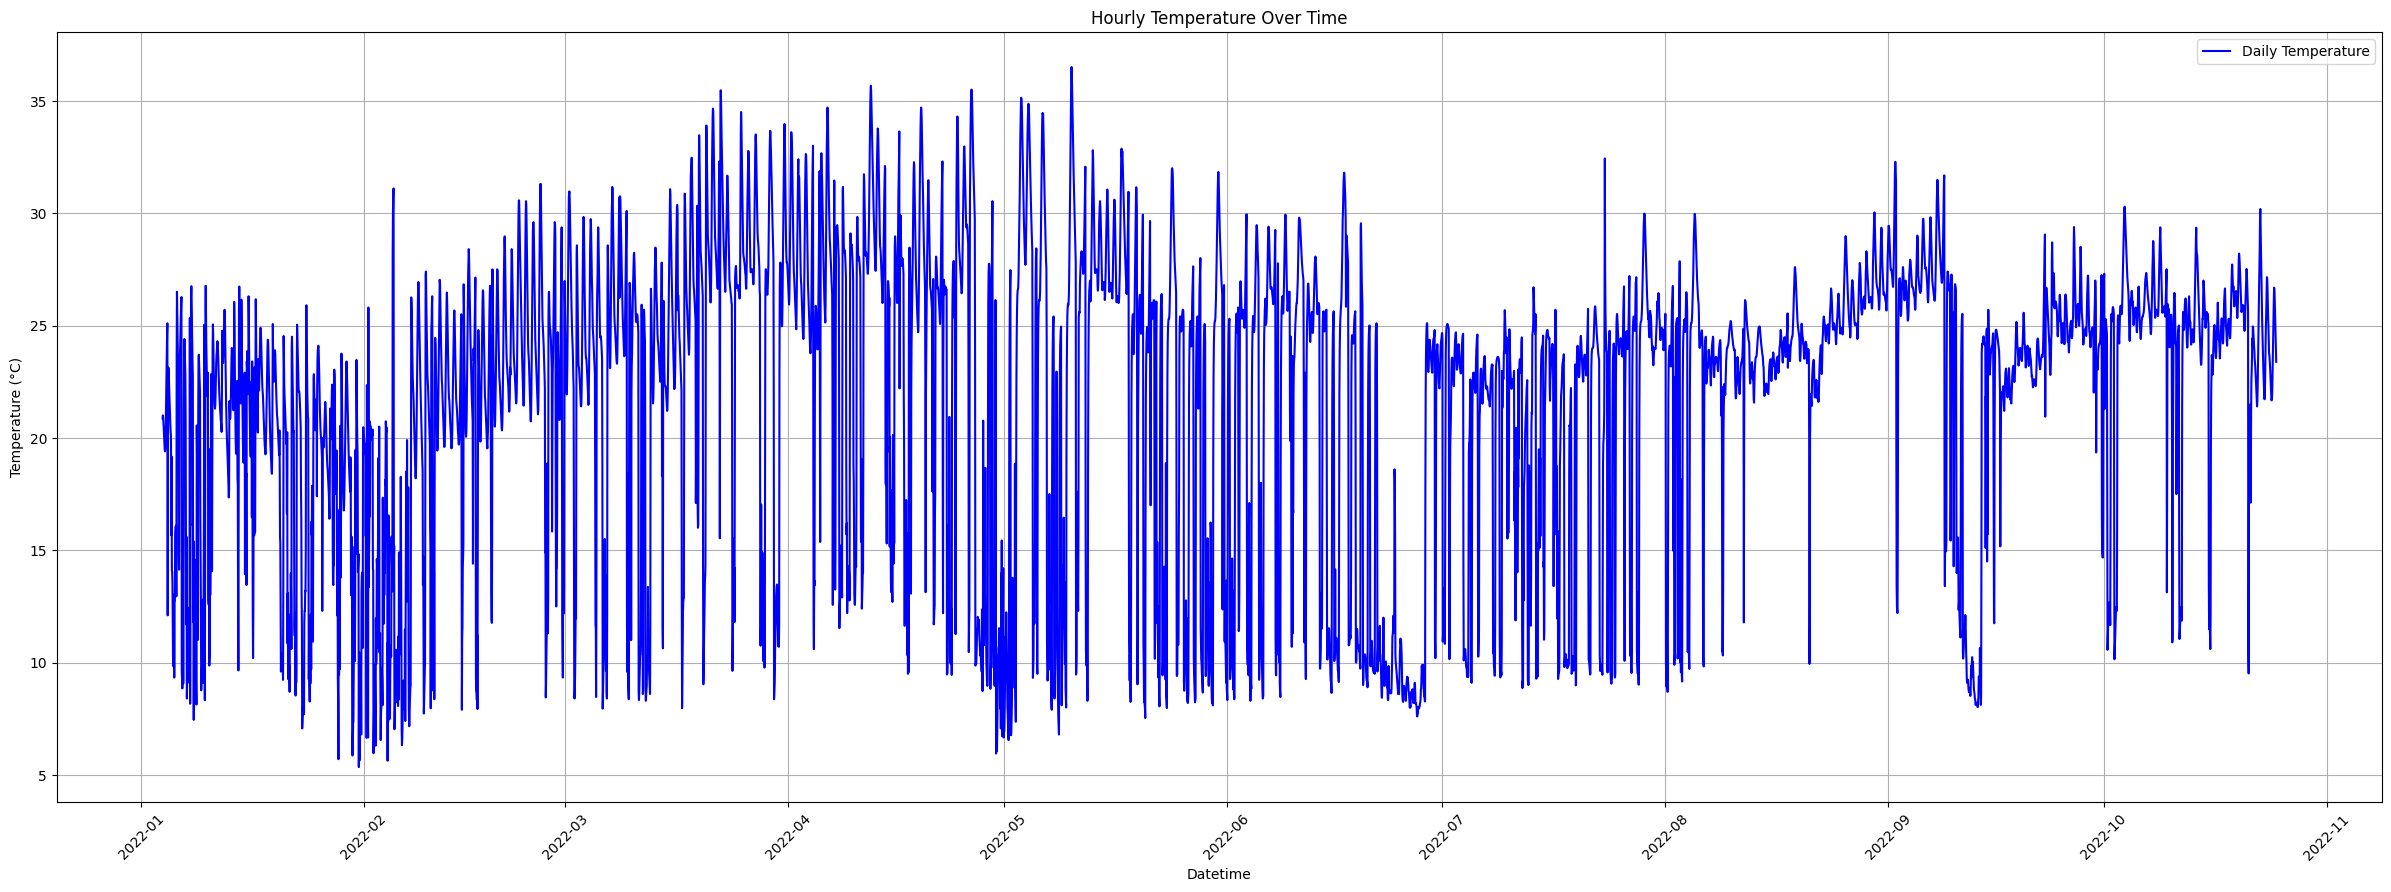

In [3]:
df['Datetime'] = pandas.to_datetime(df['Datetime'])

# Plot Hourly_Temp vs Datetime
plt.figure(figsize=(30, 10))
plt.plot(df['Datetime'], df['Hourly_Temp'], label='Daily Temperature', color='b')
plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.title('Hourly Temperature Over Time')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

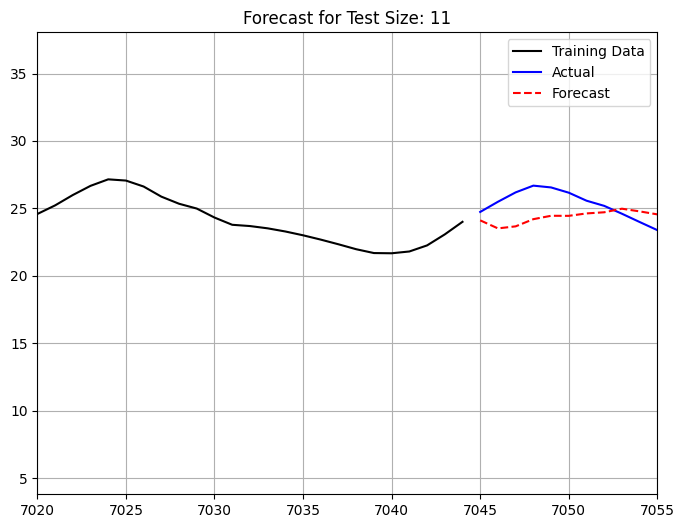

Forecast for i=-11:
24.10892142128403
Actual:
24.733

--------------------------------------------------



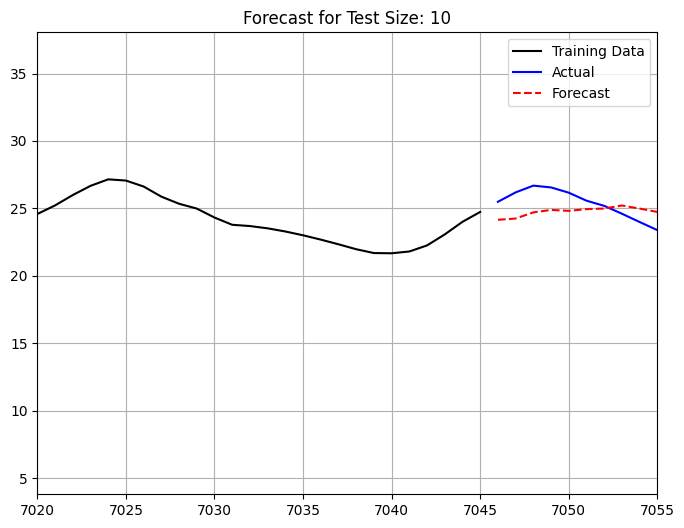

Forecast for i=-10:
24.15082056198661
Actual:
25.486

--------------------------------------------------



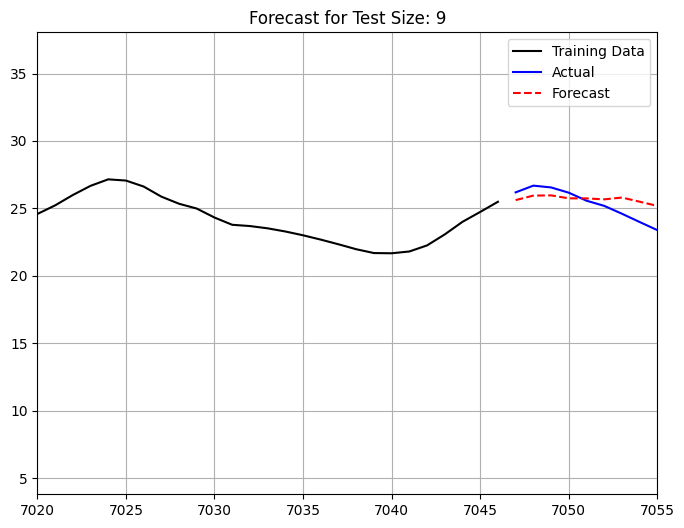

Forecast for i=-9:
25.610363358574563
Actual:
26.183

--------------------------------------------------



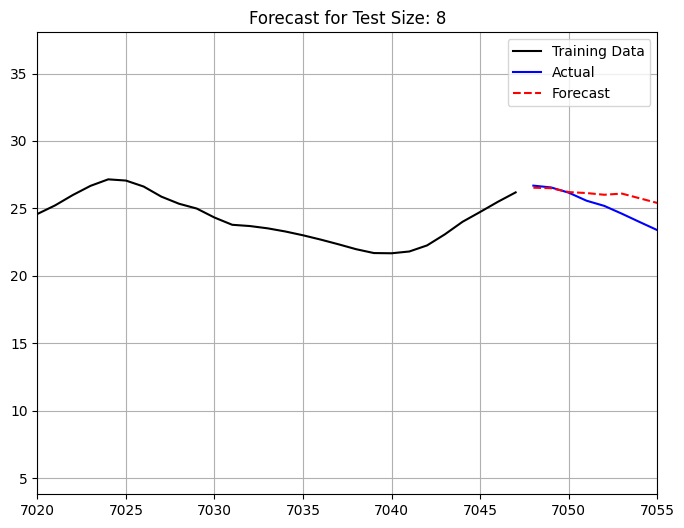

Forecast for i=-8:
26.52993969110473
Actual:
26.683

--------------------------------------------------



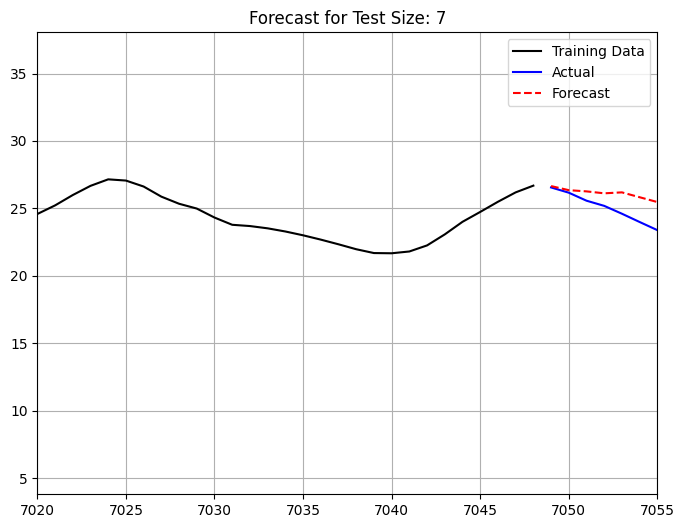

Forecast for i=-7:
26.650404599684688
Actual:
26.55

--------------------------------------------------



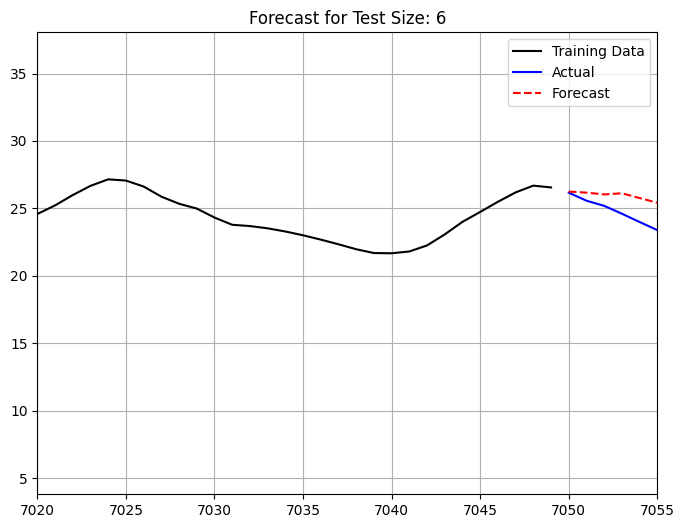

Forecast for i=-6:
26.244273488714832
Actual:
26.16

--------------------------------------------------



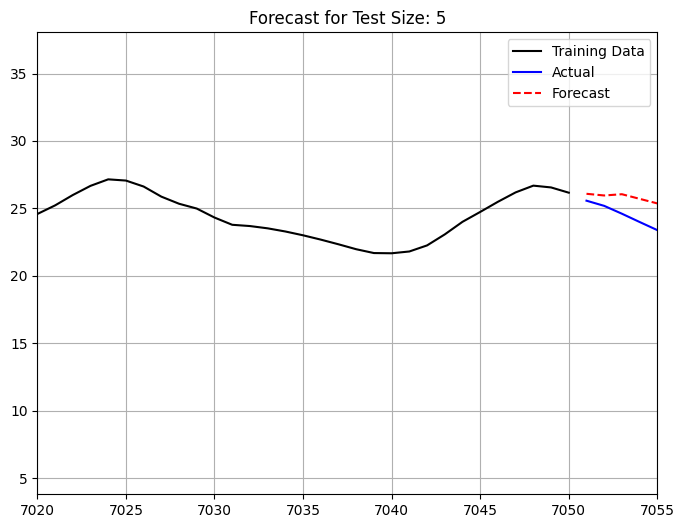

Forecast for i=-5:
26.078027613285737
Actual:
25.567

--------------------------------------------------



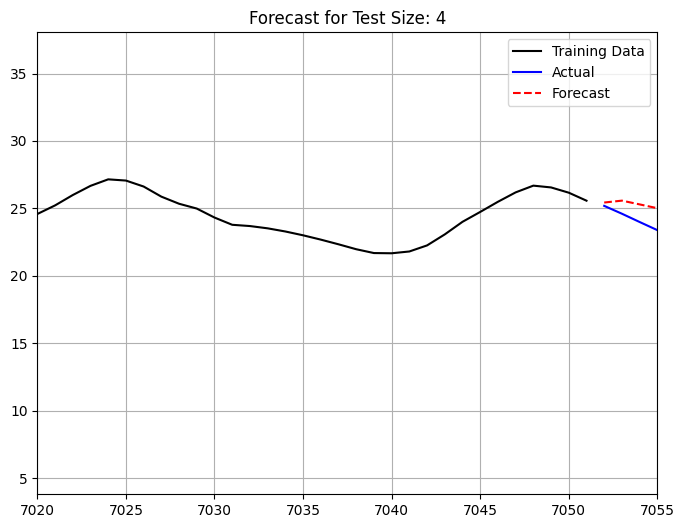

Forecast for i=-4:
25.430734582467313
Actual:
25.183

--------------------------------------------------



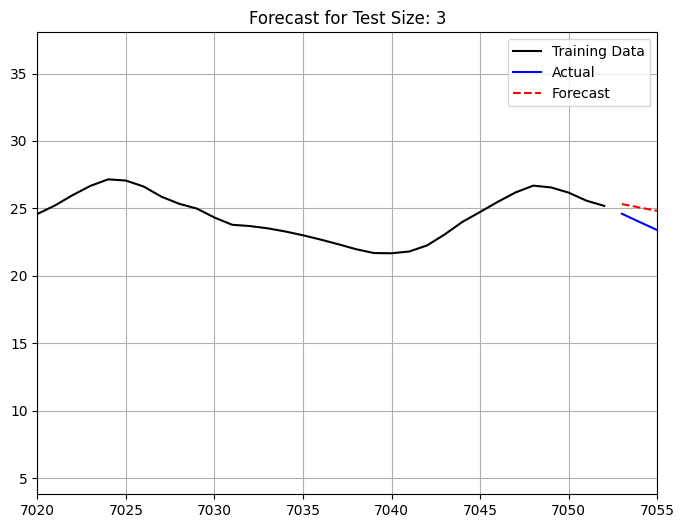

Forecast for i=-3:
25.316981317982954
Actual:
24.6

--------------------------------------------------



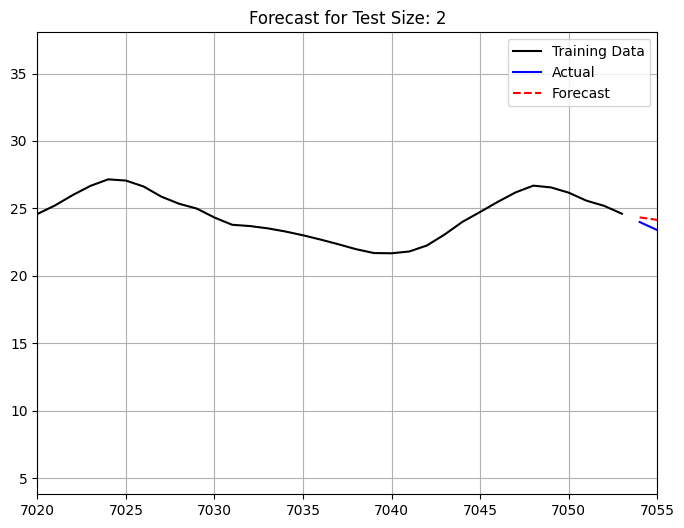

Forecast for i=-2:
24.327469073779795
Actual:
23.986

--------------------------------------------------



In [16]:
y = df["Hourly_Temp"]
actual_vs_forecast = []
m = 0
for i in range(-11, -1, 1):  # Loop from -200 to -210
    trainy = df["Hourly_Temp"].iloc[:i]  # Training set
    testy = df["Hourly_Temp"].iloc[i:]   # Testing set
    
    # Fit SARIMAX model
    model = SARIMAX(trainy, order=(3, 1, 1), seasonal_order=(0, 1, 1, 12))
    model_fit = model.fit()
    
    # Forecasting
    forecast = model_fit.forecast(steps=abs(i))  # Forecast length matches test set size
    plt.figure(figsize=(8, 6))
    plt.xlim(7020,testy.index[-1])
    plt.plot(trainy.index, trainy.values, label="Training Data", color='black')
    plt.plot(testy.index, testy, label="Actual", color='blue')
    plt.plot(testy.index, forecast, label="Forecast", color='red', linestyle='dashed')
    
    plt.grid()
    plt.legend()
    plt.title(f"Forecast for Test Size: {abs(i)}")
        
    plt.show()

    print(f"Forecast for i={i}:")   
    print(forecast.tolist()[0])  # Convert to list for cleaner output
    print("Actual:")
    print(testy.tolist()[i])
    print("\n" + "-"*50 + "\n")  # Separator for readability
    x = ((testy.tolist()[i] - forecast.tolist()[0]) / testy.tolist()[i])
    m = x + m

In [5]:
absolute_m = abs(m)
print(absolute_m)
percent = (absolute_m/10)*(100)
print("percentage: ")
print(percent)
accuracy = 100 * (1 - percent)
print(accuracy)

0.025018066274832197
percentage: 
0.25018066274832196
74.9819337251678


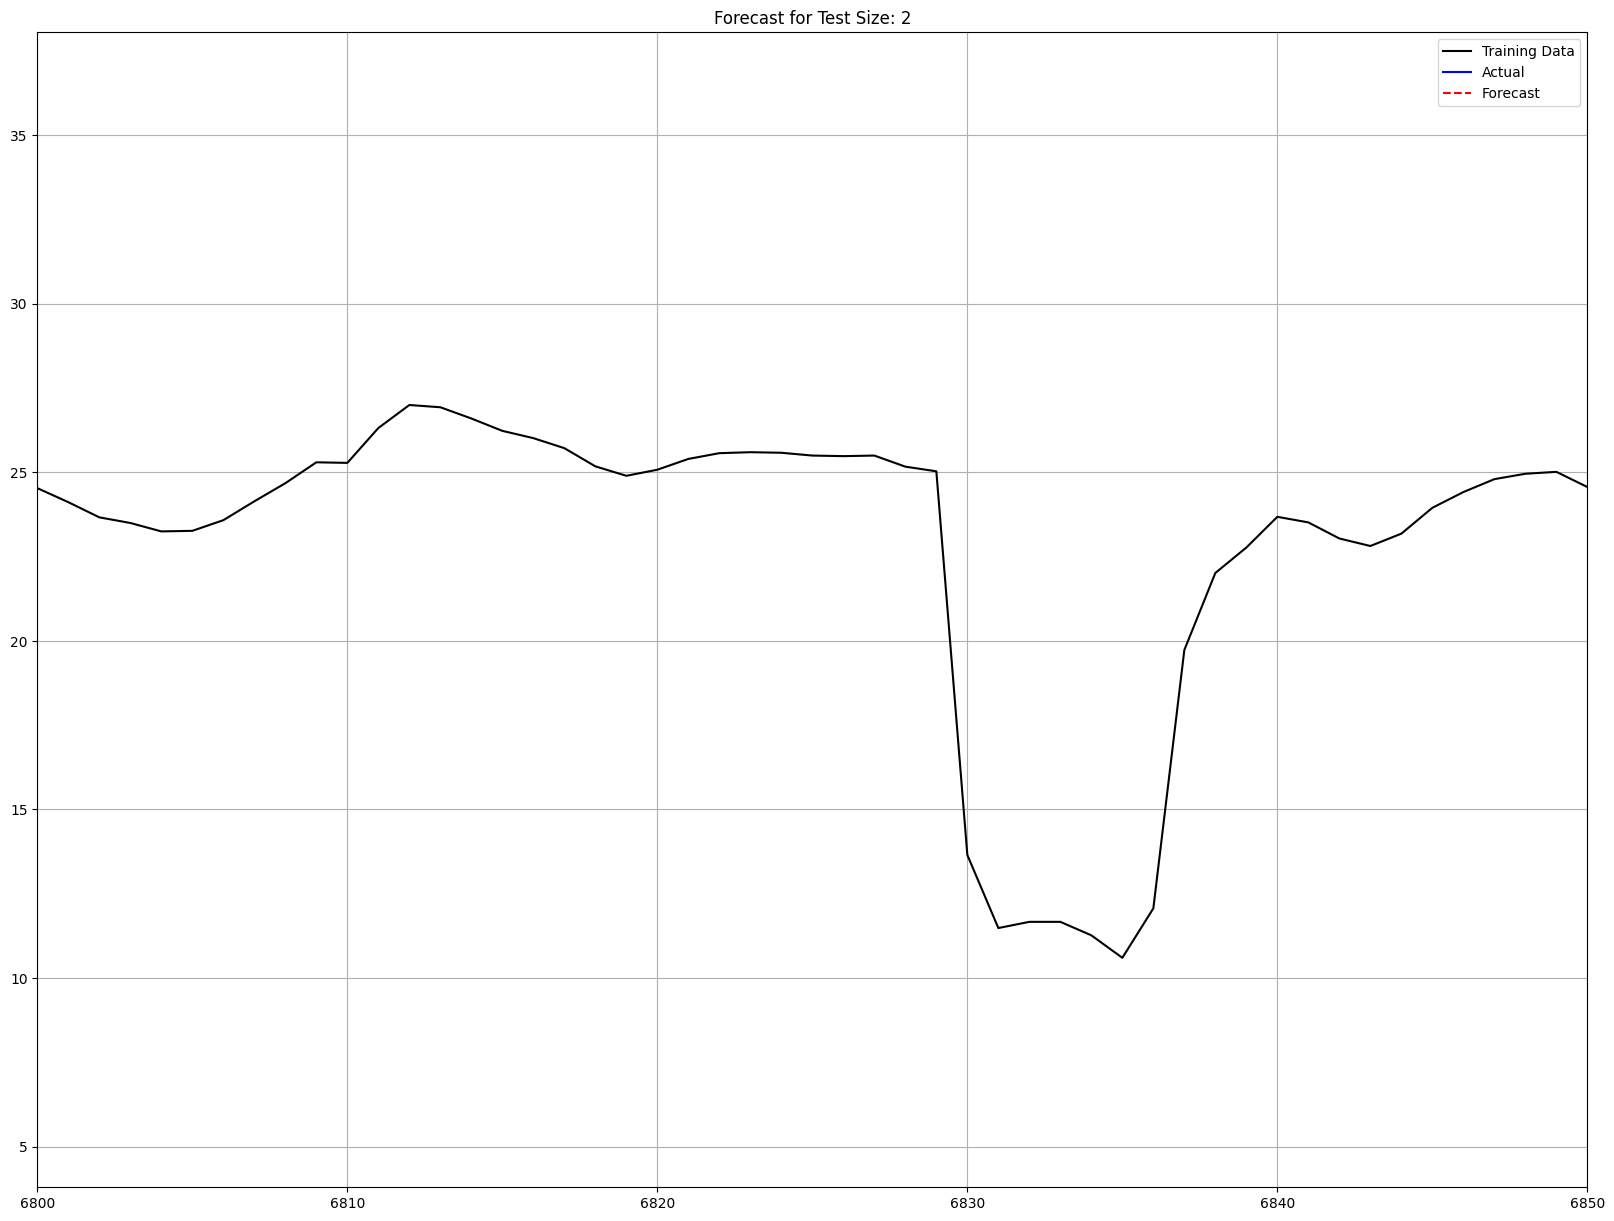

In [7]:
# Plot
plt.figure(figsize=(20, 15))
plt.xlim(6800, 6850)
plt.plot(trainy.index, trainy.values, label="Training Data", color='black')
plt.plot(testy.index, testy, label="Actual", color='blue')
plt.plot(testy.index, forecast, label="Forecast", color='red', linestyle='dashed')
    
plt.grid()
plt.legend()
plt.title(f"Forecast for Test Size: {abs(i)}")
        
plt.show()

In [ ]:
#auto_model = auto_arima(trainy, seasonal=True, stepwise=False, trace=True)
#print(auto_model.order)

In [6]:
result = adfuller(trainy)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -9.296837572598458
p-value: 1.140115449693266e-15


In [ ]:
forecast = model_fit.forecast(steps=200)
forecast

In [ ]:
plt.figure(figsize = (20,15))
plt.xlim(6500, testy.index[-1])
plt.plot(trainy.index,trainy.values)
#plt.plot(test.index,test.values)
#plt.plot(test.index,forecast.values)
plt.plot(testy.index, testy, label="Actual", color='blue')
plt.plot(testy.index, forecast, label="Forecast", color='red', linestyle='dashed')
plt.grid()
plt.show()

In [20]:
forecast = model_fit.forecast(steps=len(testy))  # Forecast length matches test set size

actual_vs_forecast.extend(zip(testy.tolist(), forecast.tolist()))
results_df = pandas.DataFrame(actual_vs_forecast, columns=["Actual", "Forecasted"])

# Compute accuracy using Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(results_df["Actual"], results_df["Forecasted"])
accuracy = 100 * (1 - mape)

print(f"Forecasting Accuracy: {accuracy:.2f}%")

Forecasting Accuracy: 97.67%
